In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Startups Dataset

In [3]:
Data=pd.read_csv('50_Startups.csv')
Data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
Data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
Data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
Data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
Data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [9]:
Data.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')]

In [10]:
Data.rename(columns={'R&D Spend':"R_and_D_Spend","Marketing Spend":"Marketing_Spend"},inplace=True)

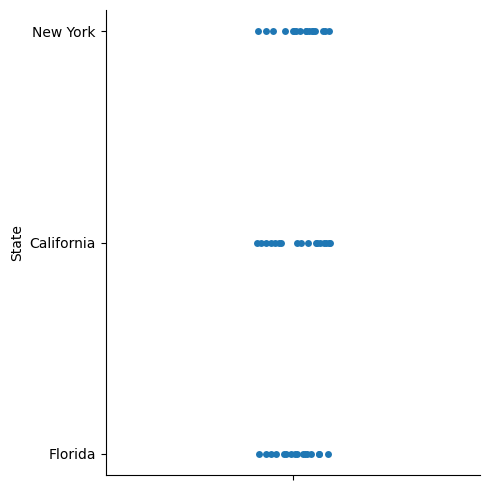

In [11]:
sns.catplot(Data['State'])

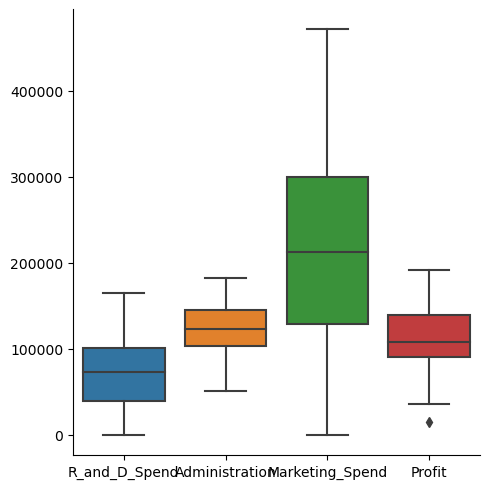

In [12]:
sns.catplot(Data,kind='box')

<Axes: xlabel='Profit', ylabel='Density'>

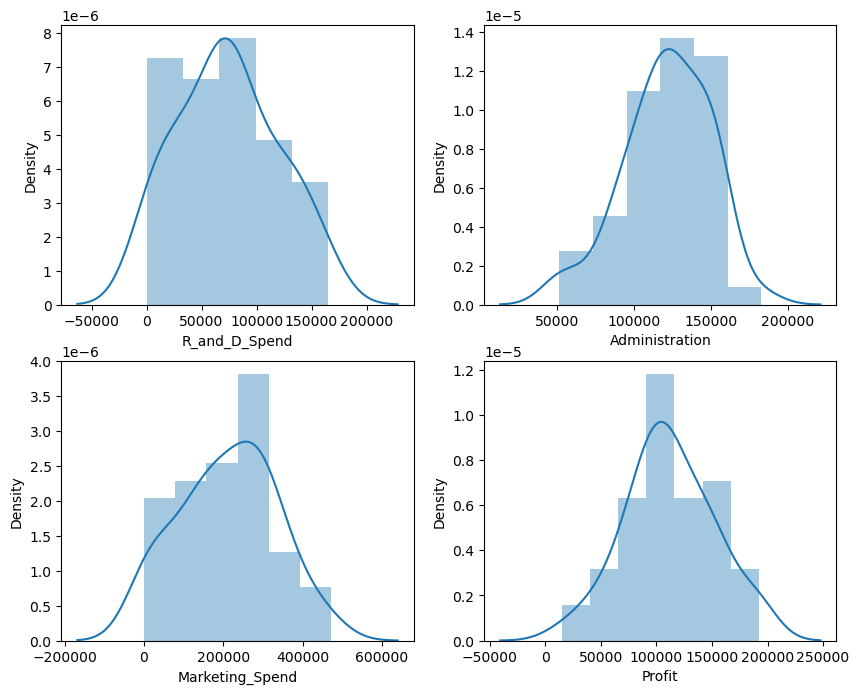

In [13]:
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.distplot(Data['R_and_D_Spend'])
plt.subplot(222)
sns.distplot(Data['Administration'])
plt.subplot(223)
sns.distplot(Data['Marketing_Spend'])
plt.subplot(224)
sns.distplot(Data['Profit'])

In [14]:
Data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [15]:
import statsmodels.formula.api as smf

model = smf.ols('Profit~R_and_D_Spend+Administration+Marketing_Spend',data=Data).fit()

In [16]:
model.params

Intercept          50122.192990
R_and_D_Spend          0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [17]:
Data['Predictions_Model']=model.fittedvalues

In [18]:
Data.head()

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit,Predictions_Model
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183


In [19]:
model.pvalues

Intercept          1.057379e-09
R_and_D_Spend      2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        20:22:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_and_D_Spend       0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model = smf.ols('Profit~R_and_D_Spend+Administration+Marketing_Spend',data=Data).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        20:22:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_and_D_Spend       0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model1 = smf.ols('Profit~R_and_D_Spend+Administration',data=Data).fit()

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           7.29e-31
Time:                        20:22:22   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
R_and_D_Spend      0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model2 = smf.ols('Profit~R_and_D_Spend+Marketing_Spend',data=Data).fit()

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.16e-31
Time:                        20:22:22   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_and_D_Spend       0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
rsq_R_and_D_Spend = smf.ols('R_and_D_Spend~Administration+Marketing_Spend',data=Data).fit().rsquared  
vif_R_and_D_Spend = 1/(1-rsq_R_and_D_Spend)

rsq_Administration = smf.ols('Administration~R_and_D_Spend+Marketing_Spend',data=Data).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketing_Spend = smf.ols('Marketing_Spend~R_and_D_Spend+Administration',data=Data).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend)
# Storing vif values in a data frame
d1 = {'Variables':['R_and_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_R_and_D_Spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_and_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [28]:
Data.head()

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit,Predictions_Model
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183


In [29]:
X=Data.iloc[:,0:3]
y=Data.iloc[:,4]

In [30]:
X.head()

,R_and_D_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [31]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import power_transform,StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.24,random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(X_train,y_train)

In [35]:
model.score(X_train,y_train)

0.9410487992106704

In [36]:
model.score(X_test,y_test)

0.9649638389802369

In [37]:
y_pred=model.predict(X_test)

In [38]:
score=r2_score(y_test,y_pred)
print('score=',score)

score= 0.9649638389802369


In [39]:
scores=cross_val_score(regressor,X_train,y_train,scoring='r2',cv=5)
scores.mean()

0.907999582818378

In [40]:
from scipy.stats import probplot

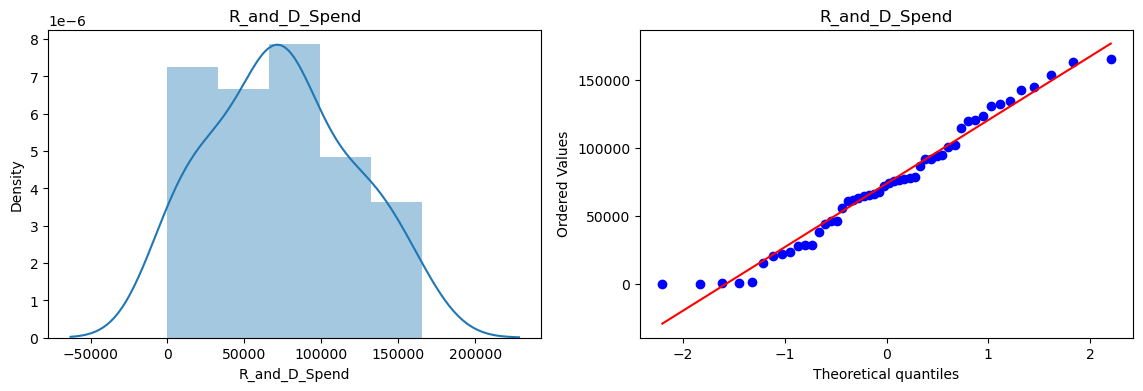

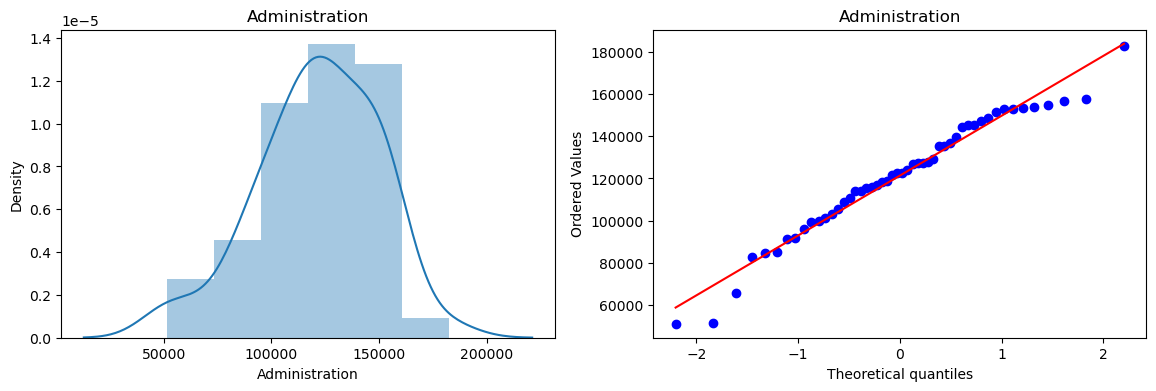

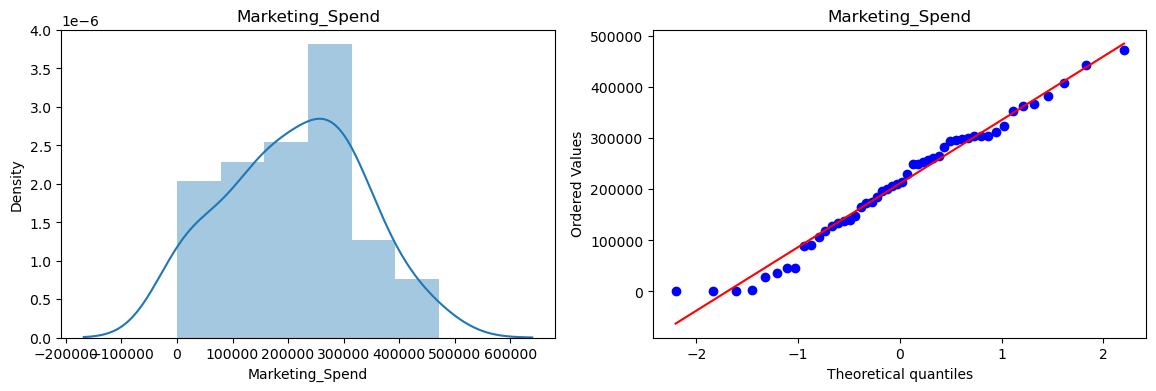

In [41]:
for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)
    
    plt.subplot(122)
    probplot(X[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.show()

# ToyotaCorolla Dataset

In [42]:
df=pd.read_csv('ToyotaCorolla.csv',usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],encoding='utf-8')

In [43]:
df.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [44]:
df.shape

(1436, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [46]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [47]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [48]:
df.axes

[RangeIndex(start=0, stop=1436, step=1),
 Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
        'Quarterly_Tax', 'Weight'],
       dtype='object')]

In [49]:
df.memory_usage(deep=True,index=False)

Price            11488
Age_08_04        11488
KM               11488
HP               11488
cc               11488
Doors            11488
Gears            11488
Quarterly_Tax    11488
Weight           11488
dtype: int64

In [50]:
df.infer_objects().dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [51]:
for label,content in df.items():
    print(f'label: {label}')
    print(f'cntent: {content}',sep='\n')

label: Price
cntent: 0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64
label: Age_08_04
cntent: 0       23
1       23
2       24
3       26
4       30
        ..
1431    69
1432    72
1433    71
1434    70
1435    76
Name: Age_08_04, Length: 1436, dtype: int64
label: KM
cntent: 0       46986
1       72937
2       41711
3       48000
4       38500
        ...  
1431    20544
1432    19000
1433    17016
1434    16916
1435        1
Name: KM, Length: 1436, dtype: int64
label: HP
cntent: 0        90
1        90
2        90
3        90
4        90
       ... 
1431     86
1432     86
1433     86
1434     86
1435    110
Name: HP, Length: 1436, dtype: int64
label: cc
cntent: 0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
1431    1300
1432    1300
1433    1300
1434    1300
1435    1600
Name: cc, Length: 1436, dtype: int64
l

In [52]:
# sns.pairplot(data=df)

<Axes: >

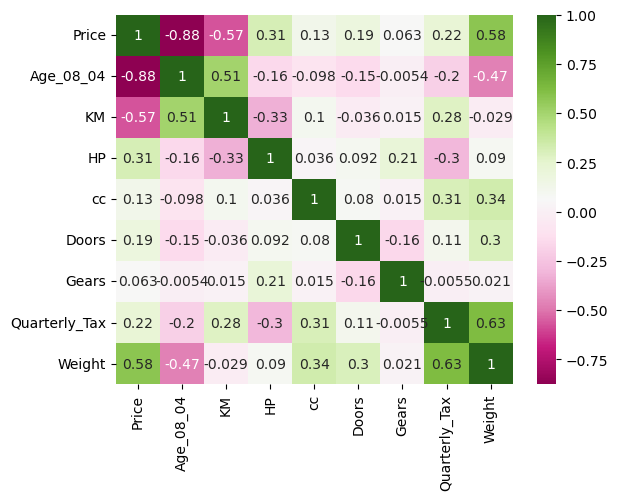

In [53]:
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [54]:
df.skew()

Price             1.703885
Age_08_04        -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

In [55]:
df.kurtosis()

Price              3.737781
Age_08_04         -0.076632
KM                 1.685057
HP                 8.836434
cc               930.711227
Doors             -1.874765
Gears             37.703476
Quarterly_Tax      4.298345
Weight            19.362901
dtype: float64

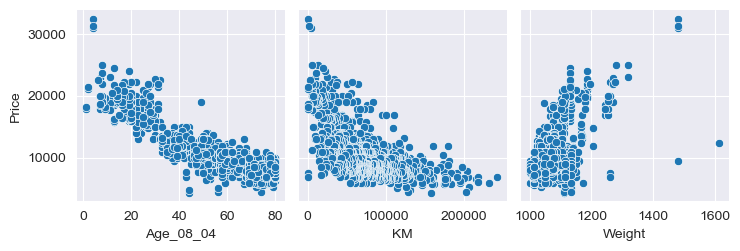

In [56]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df,x_vars=['Age_08_04','KM','Weight'],y_vars=['Price'])

<Axes: >

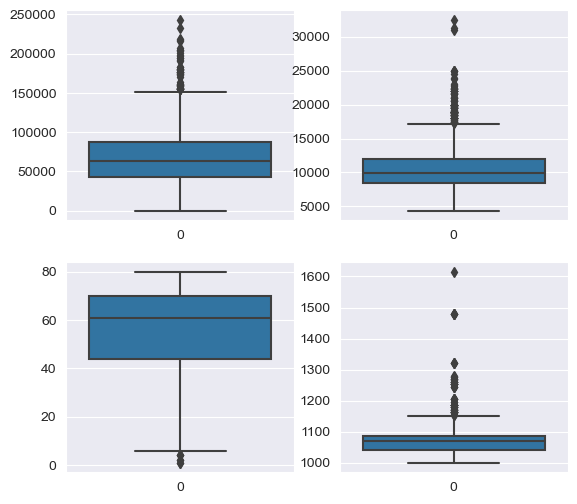

In [57]:
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.boxplot(df['KM'],)
plt.subplot(2,3,2)
sns.boxplot(df['Price'])
plt.subplot(2,3,4)
sns.boxplot(df['Age_08_04'])
plt.subplot(2,3,5)
sns.boxplot(df['Weight'])

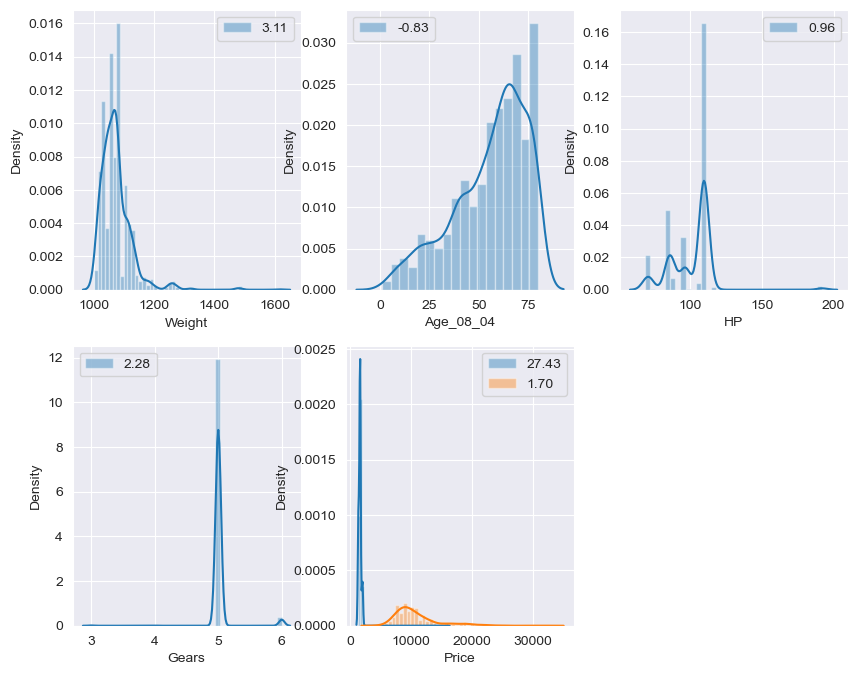

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
dist=sns.distplot(df['Weight'],label='%0.2f'%df['Weight'].skew())
dist.legend()
plt.subplot(2,3,2)
dist1=sns.distplot(df['Age_08_04'],label='%0.2f'%df['Age_08_04'].skew())
dist1.legend()
plt.subplot(2,3,3)
dist2=sns.distplot(df['HP'],label='%0.2f'%df['HP'].skew())
dist2.legend()
plt.subplot(2,3,4)
dist3=sns.distplot(df['Gears'],label='%0.2f'%df['Gears'].skew())
dist3.legend()
plt.subplot(2,3,5)
dist4=sns.distplot(df['cc'],label='%0.2f'%df['cc'].skew())
dist4.legend()
plt.subplot(2,3,5)
dist5=sns.distplot(df['Price'],label='%0.2f'%df['Price'].skew())
dist5.legend()

In [59]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [60]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [61]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [64]:
df.shape

(1435, 9)

In [65]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [66]:
df['Weights']=np.log1p(df['Weight'])

In [67]:
df.drop('Weight',inplace=True,axis=1)

In [68]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+Weights+HP',data=df).fit()

In [69]:
#Beta Coefficients
model.params

Intercept   -131336.814718
Age_08_04      -121.475364
KM               -0.020045
Weights       21101.565802
HP               29.545491
dtype: float64

In [70]:
model.fittedvalues

0       16591.704514
1       16071.506200
2       16575.968663
3       16206.952380
4       16001.775805
            ...     
1431     8716.566822
1432     8176.413710
1433     8337.659159
1434     8461.139063
1435    10742.492572
Length: 1435, dtype: float64

In [71]:
df['Predictions_Model']=model.fittedvalues

In [72]:
df['Errors_Model']=model.resid

In [73]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weights,Predictions_Model,Errors_Model
0,13500,23,46986,90,2000,3,5,210,7.061334,16591.704514,-3091.704514
1,13750,23,72937,90,2000,3,5,210,7.061334,16071.506200,-2321.506200
2,13950,24,41711,90,2000,3,5,210,7.061334,16575.968663,-2625.968663
3,14950,26,48000,90,2000,3,5,210,7.061334,16206.952380,-1256.952380
4,13750,30,38500,90,2000,3,5,210,7.065613,16001.775805,-2251.775805


In [74]:
model.pvalues

Intercept     3.299023e-79
Age_08_04    2.054831e-282
KM            5.407601e-56
Weights       4.551356e-97
HP            8.102551e-30
dtype: float64

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2197.
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:22:34   Log-Likelihood:                -12379.
No. Observations:                1435   AIC:                         2.477e+04
Df Residuals:                    1430   BIC:                         2.479e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.313e+05   6540.548    -20.080      0.000   -1.44e+05   -1.19e+05
Age_08_04   -121.4754      2.654    -45.768      0.000    -126.682    -116.269
KM            -0.0200      0.001    -16.479      0.000      -0.022      -0.018
Weights      2.11e+04    933.011     22.617      0.000    1.93e+04    2.29e+04
HP            29.5455      2.546     11.604      0.000      24.551      34.540
==============================================================================
Omnibus:                      150.221   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1020.129
Skew:                          -0.198   Prob(JB):                    3.03e-222
Kurtosis:                       7.112   Cond. No.                     1.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
rsq_age = smf.ols('Age_08_04~KM+cc+Weights+HP+Doors+Gears',data=df).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+cc+Weights+HP+Doors+Gears',data=df).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_Weight = smf.ols('Weights~KM+Age_08_04+cc+HP+Doors+Gears',data=df).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

rsq_hp = smf.ols('HP~Weights+KM+Age_08_04+cc+Doors+Gears',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~HP+Weights+KM+Age_08_04+Doors+Gears',data=df).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Door = smf.ols('Doors~HP+Weights+KM+Age_08_04+cc+Gears',data=df).fit().rsquared  
vif_Door = 1/(1-rsq_Door)

rsq_Gear = smf.ols('Gears~HP+Weights+KM+Age_08_04+cc+Doors',data=df).fit().rsquared  
vif_Gear = 1/(1-rsq_Gear)
# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','Weight','HP','cc', 'Doors', 'Gears'],'VIF':[vif_age,vif_km,vif_Weight,vif_hp,vif_cc,vif_Door,vif_Gear]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.906582
1,KM,1.659743
2,Weight,1.709939
3,HP,1.218776
4,cc,1.156262
5,Doors,1.164190
6,Gears,1.097041


In [77]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weights', 'Predictions_Model', 'Errors_Model'],
      dtype='object')

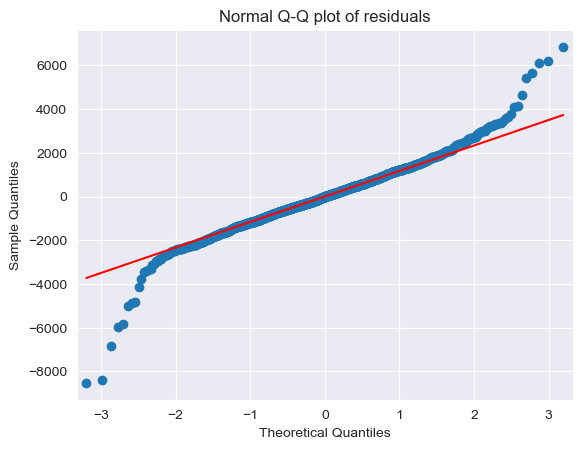

In [78]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

<Axes: >

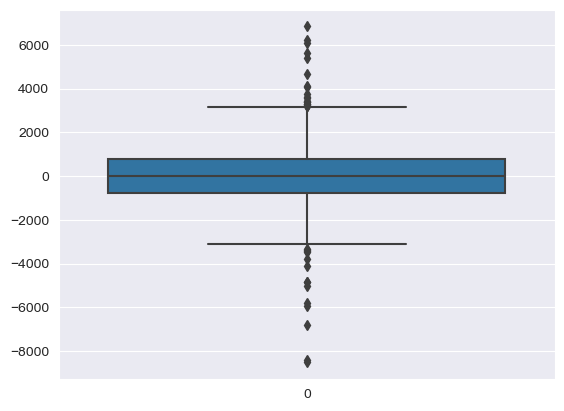

In [79]:
sns.boxplot(model.resid)

<Axes: xlabel='Errors_Model', ylabel='Density'>

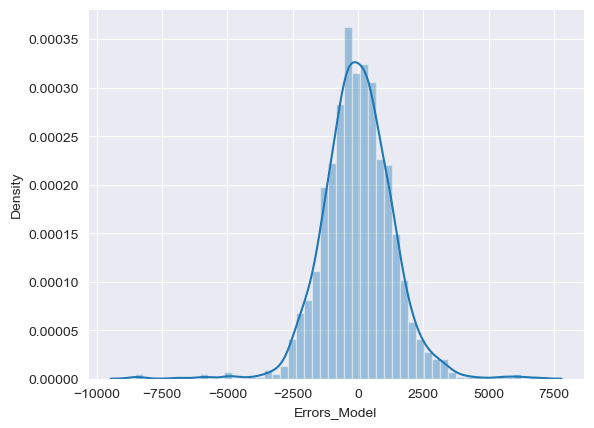

In [80]:
sns.distplot(df['Errors_Model'])

In [81]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weights,Predictions_Model,Errors_Model
0,13500,23,46986,90,2000,3,5,210,7.061334,16591.704514,-3091.704514
1,13750,23,72937,90,2000,3,5,210,7.061334,16071.506200,-2321.506200
2,13950,24,41711,90,2000,3,5,210,7.061334,16575.968663,-2625.968663
3,14950,26,48000,90,2000,3,5,210,7.061334,16206.952380,-1256.952380
4,13750,30,38500,90,2000,3,5,210,7.065613,16001.775805,-2251.775805


In [82]:

Q1=df['KM'].quantile(0.25)
Q3=df['KM'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.6*IQR
upper=Q3+1.6*IQR

upper_array=np.where(df['KM']>=upper)[0]
lower_array=np.where(df['KM']<=lower)[0]

print(upper_array)
print(lower_array)

[ 185  186  187  188  189  190  377  378  379  380  381  602  603  604
  605  606  607  608 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052
 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064]
[]


In [83]:
df['KM'].shape

(1435,)

In [84]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weights,Predictions_Model,Errors_Model
0,13500,23,46986,90,2000,3,5,210,7.061334,16591.704514,-3091.704514
1,13750,23,72937,90,2000,3,5,210,7.061334,16071.506200,-2321.506200
2,13950,24,41711,90,2000,3,5,210,7.061334,16575.968663,-2625.968663
3,14950,26,48000,90,2000,3,5,210,7.061334,16206.952380,-1256.952380
4,13750,30,38500,90,2000,3,5,210,7.065613,16001.775805,-2251.775805
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,6.933423,8716.566822,-1216.566822
1432,10845,72,19000,86,1300,3,5,69,6.923629,8176.413710,2668.586290
1433,8500,71,17016,86,1300,3,5,69,6.923629,8337.659159,162.340841
1434,7250,70,16916,86,1300,3,5,69,6.923629,8461.139063,-1211.139063


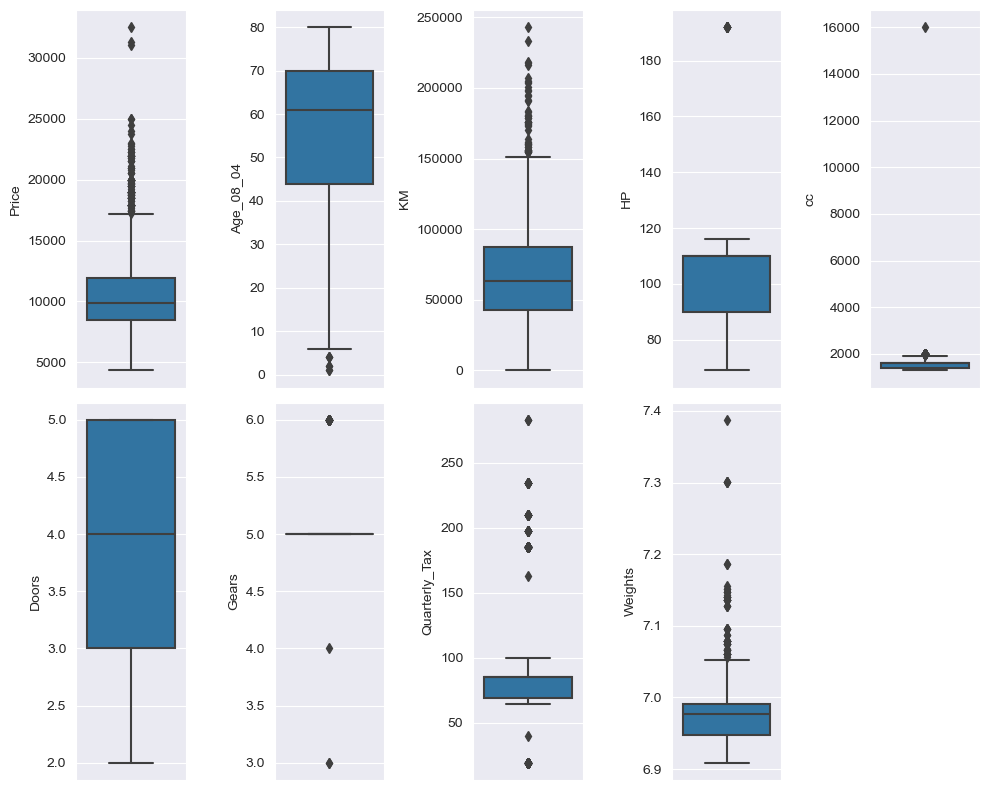

In [85]:
plt.figure(figsize=(10,8))

features=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax','Weights']

for i,col in enumerate(features):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=col,data=df)

    plt.tight_layout()
plt.show()

In [86]:
df['Gears'].value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

In [87]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weights,Predictions_Model,Errors_Model
0,13500,23,46986,90,2000,3,5,210,7.061334,16591.704514,-3091.704514
1,13750,23,72937,90,2000,3,5,210,7.061334,16071.506200,-2321.506200
2,13950,24,41711,90,2000,3,5,210,7.061334,16575.968663,-2625.968663
3,14950,26,48000,90,2000,3,5,210,7.061334,16206.952380,-1256.952380
4,13750,30,38500,90,2000,3,5,210,7.065613,16001.775805,-2251.775805


In [88]:
X=df.loc[:,['Age_08_04','KM','HP','Weights']]
y=df.iloc[:,0]

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.24,random_state=1)

In [90]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1090, 4), (345, 4), (1090,), (345,))

In [91]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(X_train,y_train)

In [92]:
y_pred=model.predict(X_test)

In [93]:
model.score(X_train,y_train)

0.8545683180848237

In [94]:
model.score(X_test,y_test)

0.8753239196469087

In [95]:
scores=cross_val_score(regressor,X_train,y_train,scoring='r2',cv=5)
scores.mean()

0.8467567417836918